In [1]:
from pathlib import Path
import re

import numpy as np

with (Path.cwd() / "day-14.txt").open("rt") as file:
    lines = [line.strip() for line in file.readlines()]

width = 101
height = 103

# lines = [
#     "p=0,4 v=3,-3",
#     "p=6,3 v=-1,-3",
#     "p=10,3 v=-1,2",
#     "p=2,0 v=2,-1",
#     "p=0,0 v=1,3",
#     "p=3,0 v=-2,-2",
#     "p=7,6 v=-1,-3",
#     "p=3,0 v=-1,-2",
#     "p=9,3 v=2,3",
#     "p=7,3 v=-1,2",
#     "p=2,4 v=2,-3",
#     "p=9,5 v=-3,-3",
# ]

# width = 11
# height = 7

from collections import namedtuple
Robot = namedtuple("Robot", ["x0", "y0", "vx", "vy"])

robots = []

for line in lines:
    m = re.match(r"p=([0-9]+),([0-9]+) v=(-?[0-9]+),(-?[0-9]+)", line)
    robots.append(Robot(int(m[1]), int(m[2]), int(m[3]), int(m[4])))

x0 = np.array([robot.x0 for robot in robots], dtype=np.int64)
y0 = np.array([robot.y0 for robot in robots], dtype=np.int64)
vx = np.array([robot.vx for robot in robots], dtype=np.int64)
vy = np.array([robot.vy for robot in robots], dtype=np.int64)

floor = np.zeros((height, width), dtype=np.int32)
x = (x0 + 100 * vx) % width
y = (y0 + 100 * vy) % height
for i in range(len(robots)):
    floor[y[i], x[i]] += 1

nw = floor[:height//2, :width//2].sum()
ne = floor[:height//2, width//2+1:].sum()
sw = floor[height//2+1:, :width//2].sum()
se = floor[height//2+1:, width//2+1:].sum()

print(f"Safety factor = {nw} * {ne} * {sw} * {se} = {nw*ne*sw*se}")

print("Done.")


Safety factor = 121 * 119 * 132 * 121 = 229980828
Done.


In [16]:
import ipywidgets as widgets

import matplotlib.pyplot as plt

# Define the plot function
def plot_function(value):
    plt.figure(figsize=(10, 5))

    x = (x0 + value * vx) % width
    y = (y0 + value * vy) % height

    plt.plot(x, y, marker='o', linestyle='None')
    plt.title(f"Plot with range 0 to {value}")
    plt.show()

# Create the widget
slider = widgets.IntSlider(min=0, max=10000, step=1, description='Range:')

# Use the widget to call the plot function
widgets.interactive(plot_function, value=slider)
# plot_function(100)


interactive(children=(IntSlider(value=0, description='Range:', max=10000), Output()), _dom_classes=('widget-in…

In [11]:
from tqdm import tqdm

def connected(xs, ys):
    floor = np.zeros((height, width), dtype=np.int32)
    floor[ys, xs] = 1
    largest = 0
    for x, y in zip(xs, ys):
        test = [(x, y)]
        size = 0
        while test:
            x, y = test.pop(0)
            if floor[y, x] == 0:
                continue
            size += 1
            floor[y, x] = 0
            if x > 0 and floor[y, x-1] == 1:
                test.append((x-1, y))
            if x < width-1 and floor[y, x+1] == 1:
                test.append((x+1, y))
            if y > 0 and floor[y-1, x] == 1:
                test.append((x, y-1))
            if y < height-1 and floor[y+1, x] == 1:
                test.append((x, y+1))

        if size > largest:
            largest = size

    return largest

maximum = 0.0
i = 0
for i in tqdm(range(10000)):
    floor[:,:] = 0
    x = (x0 + i * vx) % width
    y = (y0 + i * vy) % height

    # for j in range(len(robots)):
    #     floor[y[j], x[j]] += 1
    # if floor[:,40].sum() >= 50 or floor[:,70].sum() >= 50:
    #     print(f"Found at {i}")
    #     break

    # mx = x.mean()
    # my = y.mean()
    # dist = np.sqrt(((width/2) - mx)**2 + ((height/2) - my)**2)
    # if dist > maximum:
    #     maximum = dist
    #     print(f"New maximum at {i}: {maximum}")

    size = connected(x, y)
    if size > maximum:
        maximum = size
        print(f"New maximum at {i}: {maximum}")


  1%|          | 103/10000 [00:00<00:09, 1018.79it/s]

New maximum at 0: 3
New maximum at 1: 4
New maximum at 14: 5
New maximum at 23: 6
New maximum at 113: 7
New maximum at 163: 10


  5%|▌         | 503/10000 [00:00<00:09, 953.96it/s] 

New maximum at 334: 12


 21%|██▏       | 2135/10000 [00:02<00:10, 739.99it/s] 

New maximum at 1981: 15


 73%|███████▎  | 7316/10000 [00:07<00:02, 1134.25it/s]

New maximum at 7132: 229


100%|██████████| 10000/10000 [00:09<00:00, 1022.67it/s]


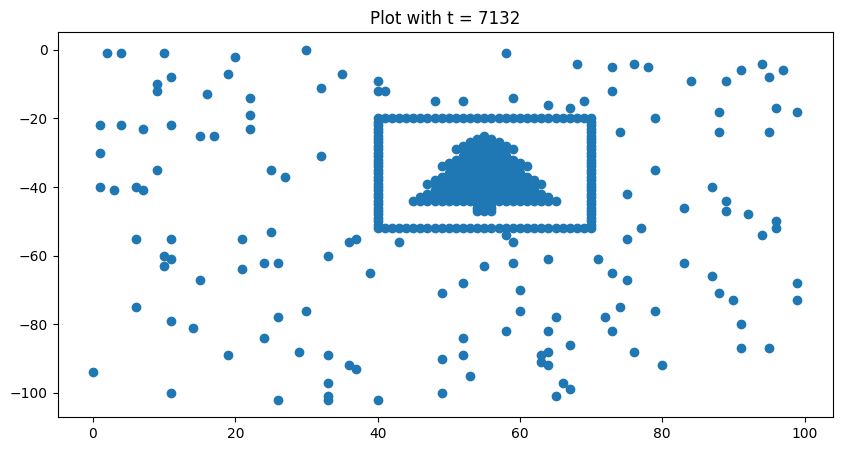

In [10]:
import matplotlib.pyplot as plt

frame = 7132
floor[:,:] = 0
x = (x0 + frame * vx) % width
y = (y0 + frame * vy) % height
for j in range(len(robots)):
    floor[y[j], x[j]] += 1

plt.figure(figsize=(10, 5))
plt.plot(x, -y, marker='o', linestyle='None')
plt.title(f"Plot with t = {frame}")
plt.show()
